<a href="https://colab.research.google.com/github/michalis0/Business-Intelligence-and-Analytics/blob/Editing/labs/04%20-%20Visualization/walkthrough_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Walkthrough - Lab 4<center>

<div>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Logo_Universit%C3%A9_de_Lausanne.svg/2000px-Logo_Universit%C3%A9_de_Lausanne.svg.png" style="padding-right:10px;width:240px;float:left" width=700/></td>
<h2 style="white-space: nowrap">Business Intelligence and Analytics</h2></td>
<hr style="clear:both">
<p style="font-size:0.85em; margin:2px; text-align:justify">

</div>

>The goal of this week's walkthrough is to introduce you to visualization tools and to teach you how to present and interpret data in graphical formats. In essence, Data Visualiation can be thought of as whole science looking at the numerous ways and choices one has to represent Data. Therefore, we will also show you some typical examples of visualization for proper representation or analysis of a given problem.
>
> In the first part of this walkthrough, you will likely encounter visualization used in the last lab session along some new ones.
>
> Then in a second part, we will go a bit further and show you how to build interactive visualizations.

##Imports and data set
>First, let's import the various librairies we'll need throughout the walkthrough.
>
>We will use [matplotlib](https://matplotlib.org/stable/index.html) a library for plotting and [seaborn](https://seaborn.pydata.org) a package for statistical data visualization.

In [ ]:
#Library imports
import pandas as pd #nothing new here
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

>Today, we will use the **credit.csv** data set, wich contains personal and economical information of credit card owners.

In [ ]:
url = 'https://media.githubusercontent.com/media/michalis0/Business-Intelligence-and-Analytics/master/data/Credit.csv'
data = pd.read_csv(url)
data.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


###Data Cleaning
>As you probably wondered, it is not very helpful nor useful to have an "Unnamed: 0" column. Lets rename it and use it as index.

In [ ]:
data = data.rename( columns = {'Unnamed: 0' : 'CustomerID' })
#data = data.set_index('CustomerID')
data.head()

,CustomerID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
summary = data.describe()
summary.round(2)

,CustomerID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,200.50,45.22,4735.60,354.94,2.96,55.67,13.45,520.02
std,115.61,35.24,2308.20,154.72,1.37,17.25,3.13,459.76
min,1.00,10.35,855.00,93.00,1.00,23.00,5.00,0.00
25%,100.75,21.01,3088.00,247.25,2.00,41.75,11.00,68.75
50%,200.50,33.12,4622.50,344.00,3.00,56.00,14.00,459.50
75%,300.25,57.47,5872.75,437.25,4.00,70.00,16.00,863.00
max,400.00,186.63,13913.00,982.00,9.00,98.00,20.00,1999.00


>As mentioned in previous labs, it is always important to check the types of each data entry in case of later of processings. We can start by getting an overview of our data set to be sure to what to expect.

In [ ]:
#get information from data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


>Now, let's begin with the visualization. During the course of this lab, we will always apply the major guidlines for successful visualization presented in the course.
>
>As a refresher :<br>
**1. Keep It Simple**<br>
**2. Design and choose the visualization well**<br>
**3. Know your audience, tell a story**<br>
**4. Have graphical integrity**

#Static Visualizations

##Boxplots

>These kinds of charts are a must when you need a statistical overview of numerical data. In a boxplot, we can see:
>
>- Mean
- Median
- Quartiles (1st and 3rd)
- Minimum
- Maximum
- Outliers
>
>For instance, imagine we were to investigate the **income distribution**. Having information on the Income satistics can be of major help in identifying the outliers.

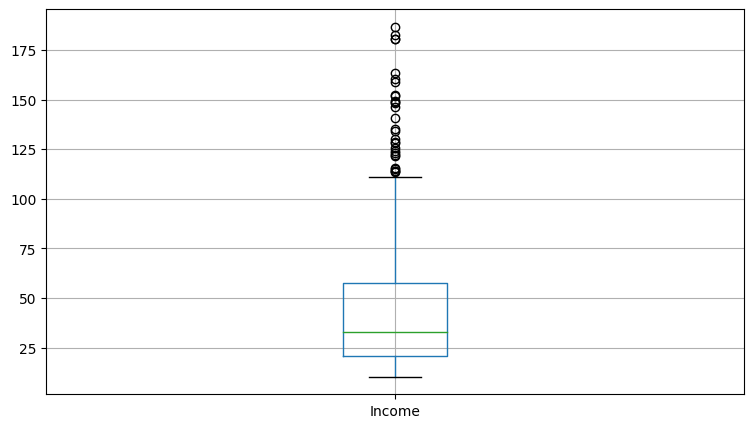

In [ ]:
#using figure size to increase the window
fig=plt.figure(figsize=(9,5))
box_plot=data.boxplot(column='Income')

##Bar plot/ Histogram

>Now let's say we were to investigate the proportion of credit card holder per gender. Using a bar chart of each gender is a good way to gain rapid insights on this customer proportion.


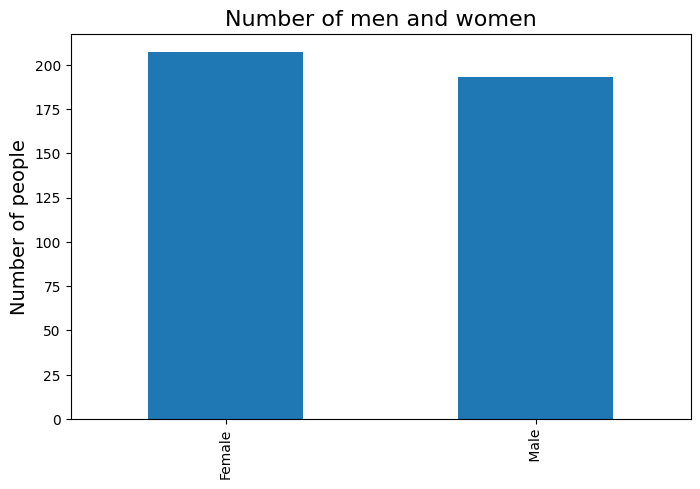

In [ ]:
data_bar = data['Gender'].value_counts()
fig=plt.figure(figsize=(8,5))

graph = data_bar.plot(kind= 'bar')

# It is possible to add many details to a graph by using simple commands. eg.
graph.set_title('Number of men and women', size=16)
graph.set_xlabel('')
txt=graph.set_ylabel('Number of people', size=14)


>It's possible to do it horizontally too by setting the kind of bar plot to `barh`.

Text(0.5, 0, 'Number of people')

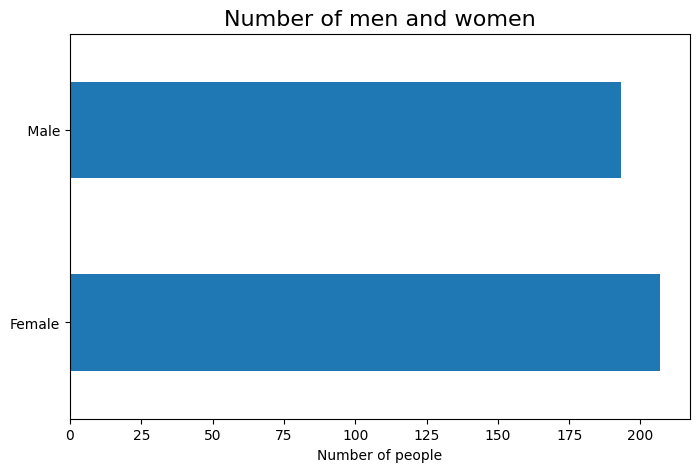

In [ ]:
fig=plt.figure(figsize=(8,5))

data_bar = data['Gender'].value_counts()
graph = data_bar.plot(kind= 'barh')
graph.set_title('Number of men and women', size=16)
graph.set_xlabel('Number of people', size=10)


>Lastly, you have to keep in mind that granularity (how much datas are being shown on the graph) plays an important role in visualization.
Here, let's take the example of the distribution of Income depending on Age.

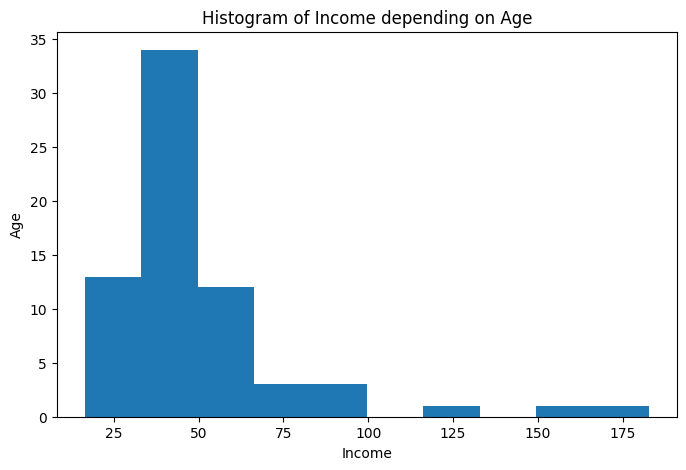

In [ ]:
fig=plt.figure(figsize=(8,5))

hist = plt.hist(data.groupby('Age')['Income'].mean())
plt.title("Histogram of Income depending on Age")
plt.xlabel("Income")
y =plt.ylabel("Age")

>Is there another kind of chart that come to your mind when thinking about how to visualize data propotion ?

##Pie chart
>Let's have a look at the proportion of customer that are students in the customer base.


Text(0.5, 1.0, 'Proportion of customer that are students')

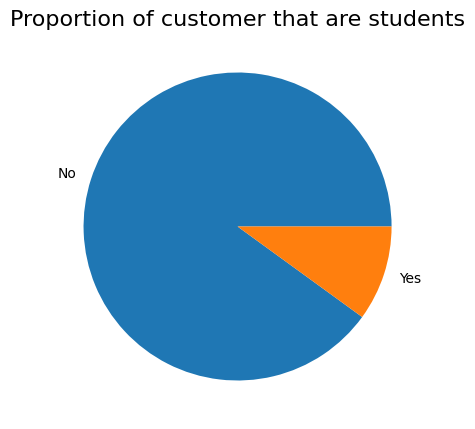

In [ ]:
data_pie = data['Student'].value_counts()
labels= data['Student'].unique() #get the unique values that can take this column of our dataframe
labels= labels.tolist() # and make it a list in order to label our further piechart
fig=plt.figure(figsize=(9,5))

graph = plt.pie(data_pie, labels= labels) #you can add as much parameters as you wish
plt.title("Proportion of customer that are students", size=16)

##Scatter plot and Lines plot

###1. Lines plot

>Now moving on to linear representations, Lines plot are used to represent evolution of a value in function of another variable. For this example, we want to represent the evolution of Income with respect to the age.

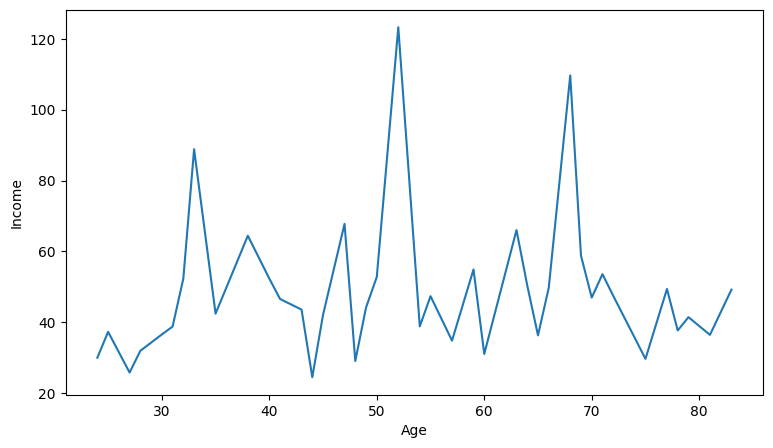

In [ ]:
fig=plt.figure(figsize=(9,5))
sb = sns.lineplot(x=data['Age'], y=data.groupby('Age')['Income'].mean(), errorbar=None) #We specify 'None' to not have the 95% ci plotted too but you can try to display it

And we can select the category of people we want, for example here is the evolution of income by age for the married people (to see more, you can directly go to the [seaborn library page]('https://seaborn.pydata.org/generated/seaborn.lineplot.html')):

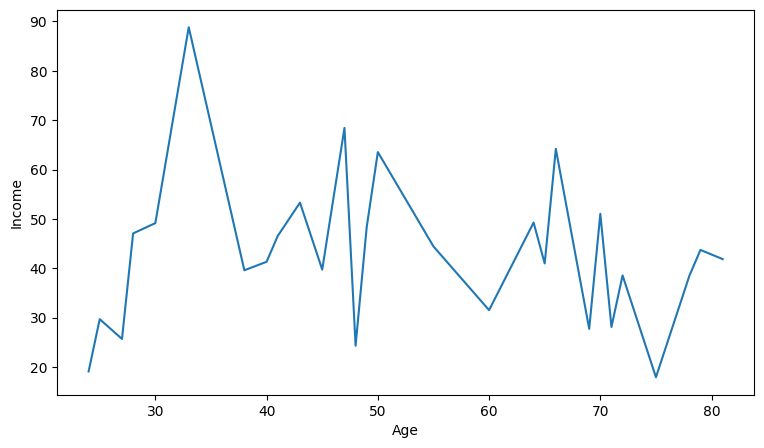

In [ ]:
fig=plt.figure(figsize=(9,5))
income_active= data.query("Married == 'Yes'")
sb = sns.lineplot(data = income_active, x='Age', y=income_active.groupby('Age')['Income'].mean(), errorbar=None)

###2. Scatter plot

>This kind of charts is very useful to visualize correlation between inputs. Let's check if device maximum debit limit is correlated with Monthly charges.
>
>You can plot a regression line by using the command **plt.plot**

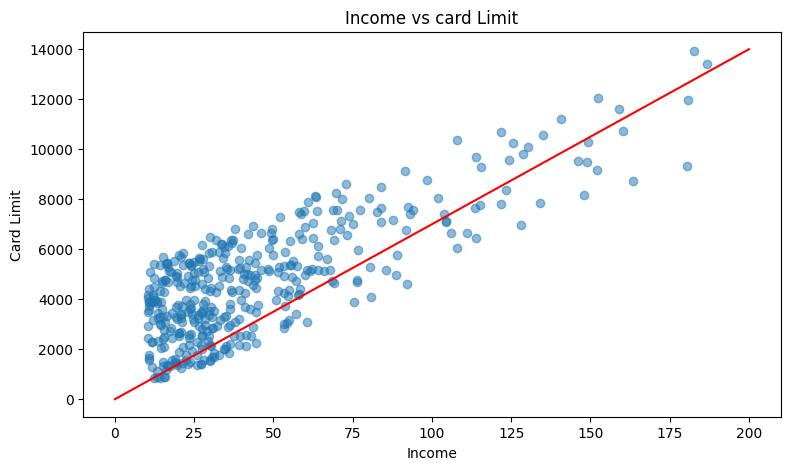

In [ ]:
fig=plt.figure(figsize=(9,5))
plt.scatter(data['Income'], data['Limit'], alpha=(1/2)) #alpha is the setting for the transparency of the regression line
plot=plt.plot([0,200], [0,14000], color='red')
plt.title("Income vs card Limit")
plt.xlabel("Income")
y =plt.ylabel("Card Limit")

##HeatMaps

>Heatmaps enable you to visualize very easily the pearsons coefficiant of correlation with an apropriate color map weach can be changed depending on user's preference.
>
>Let's try to create a heatmap of **correlations** of columns 'Limit', 'Income','Age' and 'Rating'.


Text(0.5, 1.0, 'Heatmap of correlations between dataset features')

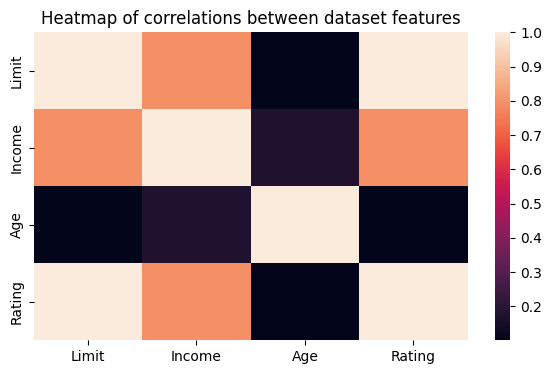

In [ ]:
fig=plt.figure(figsize=(7,4))

heat_map = data[['Limit','Income', 'Age', 'Rating']].corr() #We must ad .corr() here as we are looking for the correlations between our variables.
sb= sns.heatmap(data = heat_map)
plt.title('Heatmap of correlations between dataset features')

#Interactive Visualization

## Ipywidgets
>In this second part of the lab, we move to more interactive representations. As a first instance, we introduce widgets.  Notebooks come alive when interactive widgets are used. Using widgets helps you gain control on data and enables you to visualize changes in the data.

In [ ]:
!pip install ipywidgets --upgrade

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

>In this example, we'll simply calculate the total amount of a loan considering the **Loan Amount**, the **Interest Rate** and the number of **Years** until the term of the loan.

In [ ]:
def total_amount(amount,rate, years):
  return (amount*pow((1+rate),years))

In [ ]:
interact(total_amount, amount= widgets.IntSlider(min=10, max=300, description="Initial Amount"),
         rate = widgets.FloatSlider(min=0, max= 1,step=0.01, description='Interest Rate'),
         years= widgets.IntSlider(min=1, max=20, description='Term (years)'))
print(total_amount)

interactive(children=(IntSlider(value=10, description='Initial Amount', max=300, min=10), FloatSlider(value=0.…

<function total_amount at 0x78863fcf9ab0>


> Here is another way to add sliders with Colab. You can either write **#@param** or click on the three dots to the right of a cell and click on **add form**. <br>
Here is a [link](https://colab.research.google.com/notebooks/forms.ipynb) if you want to learn more about this feature of Colab.

In [ ]:
var_1 = 135 #@param {type:"slider", min:10, max:300, step:1}
var_2 = 0.58 #@param {type:"slider", min:0, max:1, step:0.01}
var_3 = 9 #@param {type:"slider", min:1, max:20, step:1}

print(total_amount(var_1,var_2,var_3))

8284.142314318582


>It is also, possible to use widgets as filters. Let's get back to our **credit** dataset and suppose that we want to limit the display of rows to just the rows for which the value in a particular column matches a particular categorical value.
>
>We can create a drop down list containing the distinct/unique values contained within the column, and use this to control the display of the dataframe rows. Adding an “All” option allows us to display all the rows.
>
 >Here we want to filter the values regarding the **gender** of customers:

In [ ]:
items = ['All']+sorted(data['Gender'].unique().tolist())

def view(x=''):
    if x=='All': return data
    return data[data['Gender']==x]

w = widgets.Select(options=items)
interact(view, x=w)

interactive(children=(Select(description='x', options=('All', ' Male', 'Female'), value='All'), Output()), _do…

<function __main__.view(x='')>

##Folium
>Sometimes, we need to show locations on maps. Here is a way to do so.

In [ ]:
!pip install folium --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: folium
    Found existing installation: folium 0.14.0
    Uninstalling folium-0.14.0:
      Successfully uninstalled folium-0.14.0


In [ ]:
import folium
df2 = pd.DataFrame({
   'lon':[46.5213,46.5236, 46.5209, 46.5228],
   'lat':[6.5741, 6.5846, 6.5769, 6.5796],
   'name':['Amphimax', 'Anthropole', 'Biophore', 'Banane'],
   'value':[20, 50, 40, 30]
})
# Create an empty map
v = folium.Map(location=[46.5211,  6.5802], zoom_start=15.5, width= 1000, height = 500)

# Add marker one by one on the map
for i in range(0,len(df2)):
   folium.Circle(
      location=[df2.iloc[i]['lon'], df2.iloc[i]['lat']],
      popup=df2.iloc[i]['name'],
      radius=float(df2.iloc[i]['value'])*2,
      fill=True,
      fill_color='crimson'
   ).add_to(v)
# Show the map
display(v)

##Plotly

### Treemap

>Lastly, Treemaps allow to display hierarchical data using nested rectangles. Label based, this visualiation allow all sorts of dynamic manipulations such as zooming, sector clicking etc... Execute the next cell and play with the Tree map.
We will be using the [`plotly`](https://plotly.com) library and specifically the `express` package.







In [ ]:
# will probably not need it but incase of a 'path' error
!pip install plotly --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


>Here, we get back to our initial dataset and are going to use Treemap to visualize the income repartition according to marital status, academic situation, gender and ethnicity.



In [ ]:
data.head()

,CustomerID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [ ]:
import plotly.express as px
df =data.groupby(['Ethnicity','Gender','Student','Married'])[['Income']]\
                                                                          .mean().reset_index()

df["all"] = "all" # in order to have a single root node
fig = px.treemap(df, path=['Ethnicity',	'Gender'	,'Student',	'Married'], values='Income')
fig.show()